# RADIODIFUSIÓN SONORA Y TELEVISIVA
## ISDB-T
### Profesor: De Césare, Pablo
### Alumno: Conrado, Molina

In [80]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
from scipy import signal

En la siguiente simulacion se estudian los tres modos del sistema ISDB-Tb y ademas se considera que los unicos esquemas de modulacion utilizados son QPSK, 16QAM y 64QAM.

In [81]:
kmod=1/np.sqrt(10)
mapping_table = {
    (0,0,0,0) : (-3-3j)*kmod,
    (0,0,0,1) : (-3-1j)*kmod,
    (0,0,1,0) : (-3+3j)*kmod,
    (0,0,1,1) : (-3+1j)*kmod,
    (0,1,0,0) : (-1-3j)*kmod,
    (0,1,0,1) : (-1-1j)*kmod,
    (0,1,1,0) : (-1+3j)*kmod,
    (0,1,1,1) : (-1+1j)*kmod,
    (1,0,0,0) :  (3-3j)*kmod,
    (1,0,0,1) :  (3-1j)*kmod,
    (1,0,1,0) :  (3+3j)*kmod,
    (1,0,1,1) :  (3+1j)*kmod,
    (1,1,0,0) :  (1-3j)*kmod,
    (1,1,0,1) :  (1-1j)*kmod,
    (1,1,1,0) :  (1+3j)*kmod,
    (1,1,1,1) :  (1+1j)*kmod
}

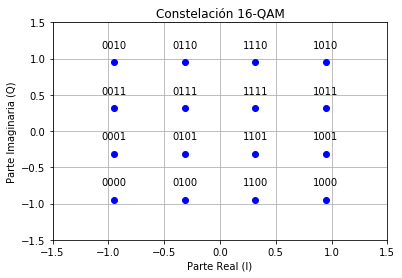

In [82]:
for b3 in [0, 1]:
    for b2 in [0, 1]:
        for b1 in [0, 1]:
            for b0 in [0, 1]:
                B = (b3, b2, b1, b0)
                Q = mapping_table[B]
                plt.plot(Q.real, Q.imag, 'bo')
                plt.text(Q.real, Q.imag+0.2, "".join(str(x) for x in B), ha='center')
plt.grid(True)
plt.xlim((-1.5, 1.5)); plt.ylim((-1.5,1.5)); plt.xlabel('Parte Real (I)'); plt.ylabel('Parte Imaginaria (Q)')
plt.title('Constelación 16-QAM');

Como se puede observar la constelacion, se realizo en código Gray. Con esta tecnica se minimizan los errores de bit si un simbolo de la constelacion se detecta de forma erronea, ademas es mas probable que los errores sean aislados siendo el proximo bit al erroneo sea detectadamente correctamente.

In [83]:
demapping_table = {v : k for k, v in mapping_table.items()}

## Simulacion de los tres modos

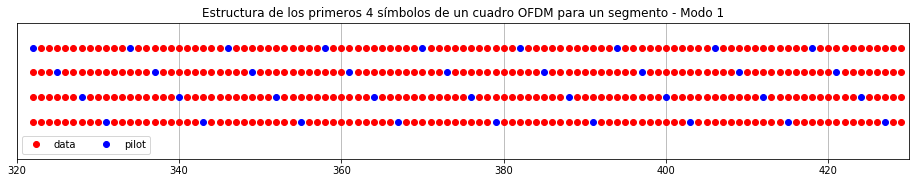

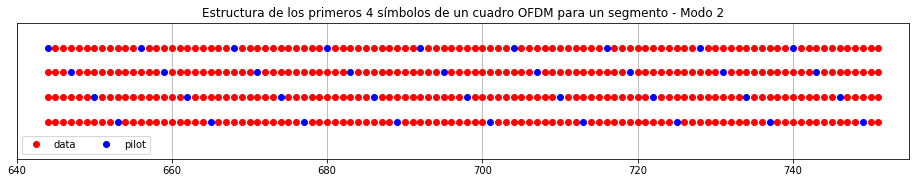

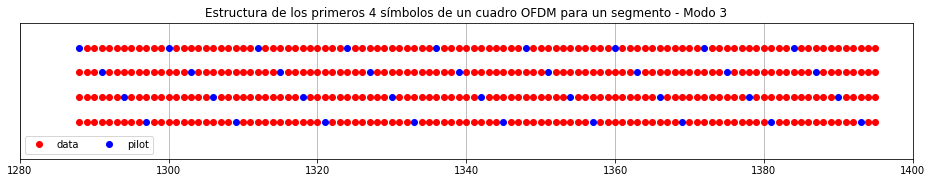

In [84]:
fs=8.12698 # 8,12698MHz, frecuencia de muestreo de la IFFT, que es común a los tres modos de operación
ts=1/fs
pilotValue = (3+3j)*kmod # Valor de cada piloto conocido por el receptor
# MODO 1
Ls_1 = 108 # Numero de portadoras por segmento
L_1 = 2048 # Numero de portadoras totales
CP_1 = L_1//4  # Duración del prefijo ciclico
Ps_1 = 9 # Número de portadoras piloto por segmento
P_1 = Ps_1*13 # Número de portadoras piloto totales
Nulas_1 = 643 # Número de portadoras nulas
allCarriers_1 = np.arange(L_1)  # subportadoras en un canal
t1_sin_CP=np.linspace(0,ts*L_1,L_1)# eje de tiempo
t1_con_CP=np.linspace(0,ts*L_1*1.25,L_1+CP_1)#eje de tiempo con CP

# Portadoras nulas
nulasCarriers_1 = np.hstack((np.arange(0,322,1),np.arange(L_1-321,L_1,1))) #portadoras nulas según la norma

# Portadoras piloto en todo el canal
pilotCarriers_11 = allCarriers_1[322:L_1-321:Ls_1//Ps_1] # pilotos cada (K/P) portadoras
pilotCarriers_12 = allCarriers_1[325:L_1-321:Ls_1//Ps_1] 
pilotCarriers_12 = np.hstack([pilot_Carriers_12, np.array([pilot_Carriers_11[-1]])])
pilotCarriers_13 = allCarriers_1[328:L_1-321:Ls_1//Ps_1] 
pilotCarriers_13 = np.hstack([pilot_Carriers_13, np.array([pilot_Carriers_11[-1]])])
pilotCarriers_14 = allCarriers_1[331:L_1-321:Ls_1//Ps_1] 
pilotCarriers_14 = np.hstack([pilot_Carriers_14, np.array([pilot_Carriers_11[-1]])])
NonDataCarrier_11 = np.append(nulasCarriers_1,pilot_Carriers_11)
NonDataCarrier_12 = np.append(nulasCarriers_1,pilot_Carriers_12)
NonDataCarrier_13 = np.append(nulasCarriers_1,pilot_Carriers_13)
NonDataCarrier_14 = np.append(nulasCarriers_1,pilot_Carriers_14)

#portadoras restantes
dataCarriers_11 = np.delete(allCarriers_1, NonDataCarrier_11)
dataCarriers_12 = np.delete(allCarriers_1, NonDataCarrier_12)
dataCarriers_13 = np.delete(allCarriers_1, NonDataCarrier_13)
dataCarriers_14 = np.delete(allCarriers_1, NonDataCarrier_14)

# MODO 2
Ls_2 = 216
L_2 = 4096
CP_2 = L_2//4
Ps_2 = 18
P_2 = Ps_2*13
allCarriers_2 = np.arange(L_2)
t2_sin_CP=np.linspace(0,ts*L_2,L_2)
t2_con_CP=np.linspace(0,ts*L_2*1.25,L_2+CP_2)

# Portadoras nulas
nulasCarriers_2 = np.hstack((np.arange(0,644,1),np.arange(L_2-643,L_2,1))) #portadoras nulas según la norma

# Portadoras piloto
pilotCarriers_21 = allCarriers_2[644:L_2-643:Ls_2//Ps_2] # pilotos cada (K/P) portadoras
pilotCarriers_22 = allCarriers_2[647:L_2-643:Ls_2//Ps_2]
pilotCarriers_22 = np.hstack([pilotCarriers_22, np.array([pilotCarriers_21[-1]])])
pilotCarriers_23 = allCarriers_2[650:L_2-643:Ls_2//Ps_2] 
pilotCarriers_23 = np.hstack([pilotCarriers_23, np.array([pilotCarriers_21[-1]])])
pilotCarriers_24 = allCarriers_2[653:L_2-643:Ls_2//Ps_2] 
pilotCarriers_24 = np.hstack([pilotCarriers_24, np.array([pilotCarriers_21[-1]])])
NonDataCarrier_21 = np.append(nulasCarriers_2,pilotCarriers_21)
NonDataCarrier_22 = np.append(nulasCarriers_2,pilotCarriers_22)
NonDataCarrier_23 = np.append(nulasCarriers_2,pilotCarriers_23)
NonDataCarrier_24 = np.append(nulasCarriers_2,pilotCarriers_24)

#portadoras restantes
dataCarriers_21 = np.delete(allCarriers_2, NonDataCarrier_21)
dataCarriers_22 = np.delete(allCarriers_2, NonDataCarrier_22)
dataCarriers_23 = np.delete(allCarriers_2, NonDataCarrier_23)
dataCarriers_24 = np.delete(allCarriers_2, NonDataCarrier_24)

# MODO 3 
Ls_3 = 432
L_3 = 8192
CP_3 = L_3//4
Ps_3 = 36
P_3 = Ps_3*13
allCarriers_3 = np.arange(L_3)
t3_sin_CP=np.linspace(0,ts*L_3,L_3)
t3_con_CP=np.linspace(0,ts*L_3*1.25,L_3+CP_3)

# Portadoras nulas
nulasCarriers_3 = np.hstack((np.arange(0,1288,1),np.arange(L_3-1287,L_3,1))) #portadoras nulas según la norma

pilotCarriers_31 = allCarriers_3[1288:L_3-1287:Ls_3//Ps_3] # pilotos cada (K/P) portadoras
pilotCarriers_32 = allCarriers_3[1291:L_3-1287:Ls_3//Ps_3] 
pilotCarriers_32 = np.hstack([pilotCarriers_32, np.array([pilotCarriers_31[-1]])])
pilotCarriers_33 = allCarriers_3[1294:L_3-1287:Ls_3//Ps_3] 
pilotCarriers_33 = np.hstack([pilotCarriers_33, np.array([pilotCarriers_31[-1]])])
pilotCarriers_34 = allCarriers_3[1297:L_3-1287:Ls_3//Ps_3] 
pilotCarriers_34 = np.hstack([pilotCarriers_34, np.array([pilotCarriers_31[-1]])])
NonDataCarrier_31 = np.append(nulasCarriers_3,pilotCarriers_31)
NonDataCarrier_32 = np.append(nulasCarriers_3,pilotCarriers_32)
NonDataCarrier_33 = np.append(nulasCarriers_3,pilotCarriers_33)
NonDataCarrier_34 = np.append(nulasCarriers_3,pilotCarriers_34)
#portadoras restantes
dataCarriers_31 = np.delete(allCarriers_3, NonDataCarrier_31)
dataCarriers_32 = np.delete(allCarriers_3, NonDataCarrier_32)
dataCarriers_33 = np.delete(allCarriers_3, NonDataCarrier_33)
dataCarriers_34 = np.delete(allCarriers_3, NonDataCarrier_34)

#Estructura de los primeros 4 simbolos de un cuadro OFDM
plt.figure(figsize=(16,2.5))
plt.title("Estructura de los primeros 4 símbolos de un cuadro OFDM para un segmento - Modo 1")
plt.plot(dataCarriers_11[0:99], np.ones_like(dataCarriers_11[0:99])*3, 'ro', label='data')
plt.plot(pilotCarriers_11[0:9], np.ones_like(pilotCarriers_11[0:9])*3, 'bo', label='pilot')
plt.plot(dataCarriers_12[0:99], np.ones_like(dataCarriers_12[0:99])*2, 'ro')
plt.plot(pilotCarriers_12[0:9], np.ones_like(pilotCarriers_12[0:9])*2, 'bo')
plt.plot(dataCarriers_13[0:99], np.ones_like(dataCarriers_13[0:99]), 'ro')
plt.plot(pilotCarriers_13[0:9], np.ones_like(pilotCarriers_13[0:9]), 'bo')
plt.plot(dataCarriers_14[0:99], np.zeros_like(dataCarriers_14[0:99]), 'ro')
plt.plot(pilotCarriers_14[0:9], np.zeros_like(pilotCarriers_14[0:9]), 'bo')
plt.legend(fontsize=10, ncol=2,loc=3)
plt.xlim((320,430))
plt.ylim((-1.5,4))
plt.yticks([])
plt.grid(True);

plt.figure(figsize=(16,2.5))
plt.title("Estructura de los primeros 4 símbolos de un cuadro OFDM para un segmento - Modo 2")
plt.plot(dataCarriers_21[0:99], np.ones_like(dataCarriers_21[0:99])*3, 'ro', label='data')
plt.plot(pilotCarriers_21[0:9], np.ones_like(pilotCarriers_21[0:9])*3, 'bo', label='pilot')
plt.plot(dataCarriers_22[0:99], np.ones_like(dataCarriers_22[0:99])*2, 'ro')
plt.plot(pilotCarriers_22[0:9], np.ones_like(pilotCarriers_22[0:9])*2, 'bo')
plt.plot(dataCarriers_23[0:99], np.ones_like(dataCarriers_23[0:99]), 'ro')
plt.plot(pilotCarriers_23[0:9], np.ones_like(pilotCarriers_23[0:9]), 'bo')
plt.plot(dataCarriers_24[0:99], np.zeros_like(dataCarriers_24[0:99]), 'ro')
plt.plot(pilotCarriers_24[0:9], np.zeros_like(pilotCarriers_24[0:9]), 'bo')
plt.legend(fontsize=10, ncol=2,loc=3)
plt.xlim((640,755))
plt.ylim((-1.5,4))
plt.yticks([])
plt.grid(True);

plt.figure(figsize=(16,2.5))
plt.title("Estructura de los primeros 4 símbolos de un cuadro OFDM para un segmento - Modo 3")
plt.plot(dataCarriers_31[0:99], np.ones_like(dataCarriers_31[0:99])*3, 'ro', label='data')
plt.plot(pilotCarriers_31[0:9], np.ones_like(pilotCarriers_31[0:9])*3, 'bo', label='pilot')
plt.plot(dataCarriers_32[0:99], np.ones_like(dataCarriers_32[0:99])*2, 'ro')
plt.plot(pilotCarriers_32[0:9], np.ones_like(pilotCarriers_32[0:9])*2, 'bo')
plt.plot(dataCarriers_33[0:99], np.ones_like(dataCarriers_33[0:99]), 'ro')
plt.plot(pilotCarriers_33[0:9], np.ones_like(pilotCarriers_33[0:9]), 'bo')
plt.plot(dataCarriers_34[0:99], np.zeros_like(dataCarriers_34[0:99]), 'ro')
plt.plot(pilotCarriers_34[0:9], np.zeros_like(pilotCarriers_34[0:9]), 'bo')
plt.legend(fontsize=10, ncol=2,loc=3)
plt.xlim((1280,1400))
plt.ylim((-1.5,4))
plt.yticks([])
plt.grid(True);

In [85]:
# Payload del símbolo OFDM
mu = 4 # bits por simbolo (i.e. 16-QAM)
#Numero de bits de datos por símbolo OFDM
#MODO 1
payloadBits_per_OFDM_1 = len(dataCarriers_11)*mu 
#MODO 2
payloadBits_per_OFDM_2 = len(dataCarriers_21)*mu  
#MODO 3
payloadBits_per_OFDM_3 = len(dataCarriers_31)*mu 

### Canal de comunicaciones inalaḿbrico

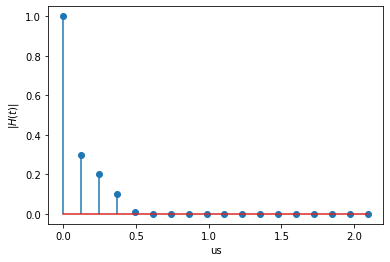

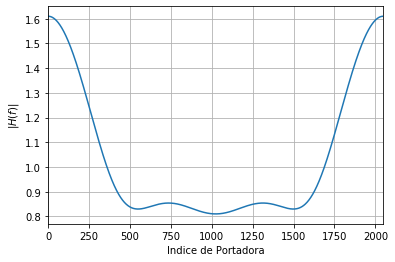

In [86]:
#Respuesta al impulso de un canal de comunicaciones (entre transmisor y receptor)
plt.figure()
channelResponse = np.array([1,0.3,0.2,0.1,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0])
plt.stem(t1_sin_CP[0:len(channelResponse)],np.abs(channelResponse),use_line_collection=True)
plt.xlabel('us'); plt.ylabel('$|H(t)|$');
H_exact = np.fft.fft(channelResponse, L_1)
plt.figure()
plt.plot(allCarriers_1, abs(H_exact))
plt.xlabel('Indice de Portadora'); plt.ylabel('$|H(f)|$'); plt.grid(True); plt.xlim(0, L_1-1)
SNRdb = 25  #Relación señal a ruido en dB en el receptor

In [87]:
#Ahora se crea una secuencia aleatoria de bits
bits1 = np.random.binomial(n=1, p=0.5, size=(payloadBits_per_OFDM_1, ))
bits2 = np.random.binomial(n=1, p=0.5, size=(payloadBits_per_OFDM_2, ))
bits3 = np.random.binomial(n=1, p=0.5, size=(payloadBits_per_OFDM_3, ))
print ("N° de bits modo 1: ", len(bits1))
print ("N° de bits modo 2: ", len(bits2))
print ("N° de bits modo 3: ", len(bits3))
print ("Primeros 25 bits modo 1: ", bits1[:25])
print ("Primeros 25 bits modo 2: ", bits2[:25])
print ("Primeros 25 bits modo 3: ", bits3[:25])
print ("Media : ", np.mean(bits1)) #debe ser al rededor de 0,5 

N° de bits modo 1:  5148
N° de bits modo 2:  10296
N° de bits modo 3:  20592
Primeros 20 bits modo 1:  [0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 0 0]
Primeros 20 bits modo 2:  [1 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1]
Primeros 20 bits modo 3:  [0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1]
Media :  0.5056332556332557


In [88]:
#Ahora se pasa el flujo de bits creado por un conversor serie-paralelo
#para agrupar los bits para el cuadro OFDM en grupos de mu bits, es decir un grupo por cada subportadora.
def SP(bits,modo):
    if modo==1:
        return bits.reshape((len(dataCarriers_11), mu))
    if modo==2:
        return bits.reshape((len(dataCarriers_21), mu))
    if modo==3:
        return bits.reshape((len(dataCarriers_31), mu))
bits_SP_1 = SP(bits1,1)
bits_SP_2 = SP(bits2,2)
bits_SP_3 = SP(bits3,3)
print ("Primeros 6 grupos modo 1")
print (bits_SP_1[:6,:])
print ("Primero_s 6 grupos modo 2")
print (bits_SP_2[:6,:])
print ("Primeros 6 grupos modo 3")
print (bits_SP_3[:6,:])

Primeros 6 grupos modo 1
[[0 0 0 0]
 [1 0 1 1]
 [0 0 1 1]
 [1 1 0 0]
 [1 1 0 0]
 [1 0 1 0]]
Primero_s 6 grupos modo 2
[[1 1 1 0]
 [1 1 0 1]
 [0 0 0 1]
 [0 1 0 0]
 [1 1 0 1]
 [1 0 1 0]]
Primeros 6 grupos modo 3
[[0 0 0 1]
 [1 1 1 0]
 [0 0 1 1]
 [1 1 1 0]
 [1 1 1 1]
 [0 1 1 0]]


Cantidad de portadoras OFDM en el dominio de la frecuencia, modo 1:  2048
Cantidad de portadoras OFDM en el dominio de la frecuencia, modo 2:  4096
Cantidad de portadoras OFDM en el dominio de la frecuencia, modo 3:  8192


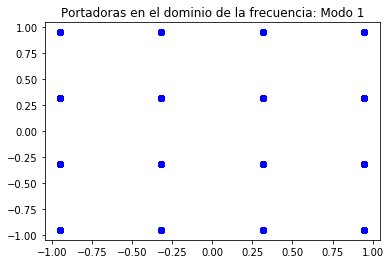

In [89]:
#Luego se envia los grupos de 4 bits al mapeador, 
#donde se convierte en simbolos de la constelacion complejos siguiendo la tabla definida al principio (mapping_table)

def Mapping(bits):
    return np.array([mapping_table[tuple(b)] for b in bits])

QAM_1 = Mapping(bits_SP_1)
QAM_2 = Mapping(bits_SP_2)
QAM_3 = Mapping(bits_SP_3)

#Ahora se realiza la asignacion de diferentes subportadoras con datos y pilotos.
#Para cada subportadora se define si va a trasnportar datos o una poloto (dataCarriers o pilotCarriers)
#Eso es necesario para crear los datos generales de OFDM, se necesitan datos y pilotos enlas portadoras.


def OFDM_symbol(QAM_payload,i,modo):
    if modo==1:
        symbol = np.zeros(L_1, dtype=complex) # Cero en todas las portadoras
        #se carga el valor del piloto siguiente la secuencia y se ubican los datos en las portadoras
        if i==0:
            symbol[pilotCarriers_11] = pilotValue 
            symbol[dataCarriers_11] = QAM_payload
        if i==1:
            symbol[pilotCarriers_12] = pilotValue
            symbol[dataCarriers_12] = QAM_payload
        if i==2:
            symbol[pilotCarriers_13] = pilotValue
            symbol[dataCarriers_13] = QAM_payload
        if i==3:
            symbol[pilotCarriers_14] = pilotValue 
            symbol[dataCarriers_14] = QAM_payload
        return symbol
    if modo==2:
        symbol = np.zeros(L_2, dtype=complex) # Cero en todas las portadoras
        #se carga el valor del piloto siguiente la secuencia y se ubican los datos en las portadoras
        if i==0:
            symbol[pilotCarriers_21] = pilotValue
            symbol[dataCarriers_21] = QAM_payload
        if i==1:
            symbol[pilotCarriers_22] = pilotValue
            symbol[dataCarriers_22] = QAM_payload
        if i==2:
            symbol[pilotCarriers_23] = pilotValue 
            symbol[dataCarriers_23] = QAM_payload
        if i==3:
            symbol[pilotCarriers_24] = pilotValue
            symbol[dataCarriers_24] = QAM_payload
        return symbol
    if modo==3:
        symbol = np.zeros(L_3, dtype=complex) # Cero en todas las portadoras
        #se carga el valor del piloto siguiente la secuencia y se ubican los datos en las portadoras
        if i==0:
            symbol[pilotCarriers_31] = pilotValue 
            symbol[dataCarriers_31] = QAM_payload
        if i==1:
            symbol[pilotCarriers_32] = pilotValue
            symbol[dataCarriers_32] = QAM_payload
        if i==2:
            symbol[pilotCarriers_33] = pilotValue
            symbol[dataCarriers_33] = QAM_payload
        if i==3:
            symbol[pilotCarriers_34] = pilotValue
            symbol[dataCarriers_34] = QAM_payload
        return symbol

OFDM_data_1 = OFDM_symbol(QAM_1,0,1)
OFDM_data_2 = OFDM_symbol(QAM_2,0,2)
OFDM_data_3 = OFDM_symbol(QAM_3,0,3)
print ("Cantidad de portadoras OFDM en el dominio de la frecuencia, modo 1: ", len(OFDM_data_1))
print ("Cantidad de portadoras OFDM en el dominio de la frecuencia, modo 2: ", len(OFDM_data_2))
print ("Cantidad de portadoras OFDM en el dominio de la frecuencia, modo 3: ", len(OFDM_data_3))
plt.figure("Portadoras en el dominio de la frecuencia:  Modo 1")
plt.title("Portadoras en el dominio de la frecuencia: Modo 1")
plt.plot(OFDM_data_1.real[dataCarriers_11],OFDM_data_1.imag[dataCarriers_11],'bo');

Cantidad de muestras OFDM en el dominio del tiempo antes de agregar el prefijo cíclico, modo 1:  2048
Cantidad de muestras OFDM en el dominio del tiempo antes de agregar el prefijo cíclico, modo 2:  4096
Cantidad de muestras OFDM en el dominio del tiempo antes de agregar el prefijo cíclico, modo 3:  8192
Duración del símbolo activo 252.000us, modo 1.
Duración del símbolo activo 504.000us, modo 2.
Duración del símbolo activo 1008.001us, modo 3.


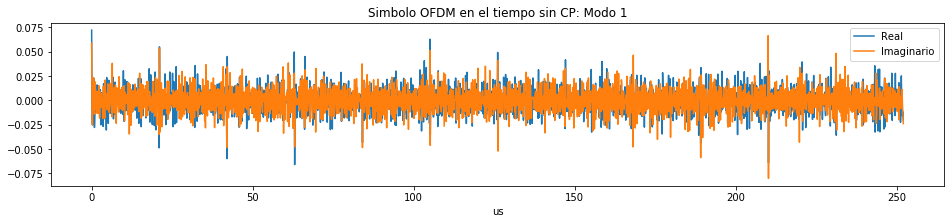

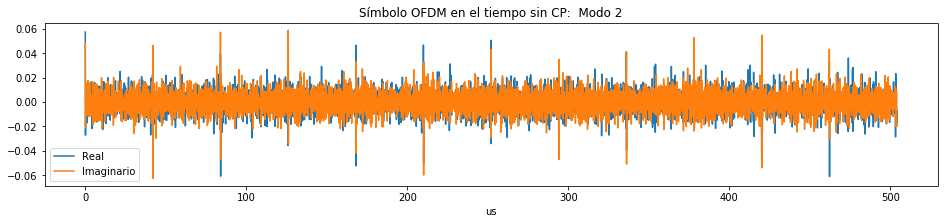

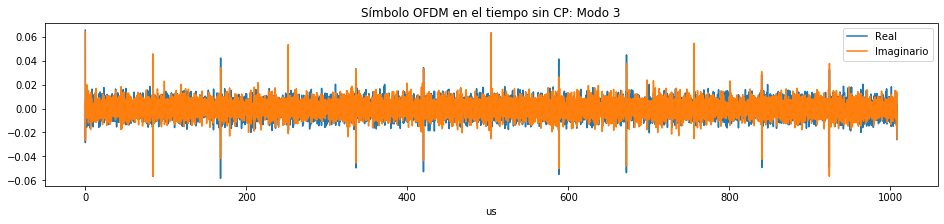

In [90]:
#Mediante la IFFT las portadoras de OFDM se transportan al dominio del tiempo 

def IFFT(OFDM_data):
    return np.fft.ifft(OFDM_data)

OFDM_time_1 = IFFT(OFDM_data_1)
OFDM_time_2 = IFFT(OFDM_data_2)
OFDM_time_3 = IFFT(OFDM_data_3)

print ("Cantidad de muestras OFDM en el dominio del tiempo antes de agregar el prefijo cíclico, modo 1: ", len(OFDM_time_1))
print ("Cantidad de muestras OFDM en el dominio del tiempo antes de agregar el prefijo cíclico, modo 2: ", len(OFDM_time_2))
print ("Cantidad de muestras OFDM en el dominio del tiempo antes de agregar el prefijo cíclico, modo 3: ", len(OFDM_time_3))

plt.figure(figsize=(16,3))
plt.title("Simbolo OFDM en el tiempo sin CP: Modo 1")
plt.xlabel("us")
plt.plot(t1_sin_CP,OFDM_time_1.real,label="Real")
plt.plot(t1_sin_CP,OFDM_time_1.imag,label="Imaginario")
plt.legend(fontsize=10)
print("Duración del símbolo activo {0:.3f}us, modo 1.".format(t1_sin_CP[-1]))
plt.figure(figsize=(16,3))
plt.title("Símbolo OFDM en el tiempo sin CP:  Modo 2")
plt.xlabel("us")
plt.plot(t2_sin_CP,OFDM_time_2.real,label="Real")
plt.plot(t2_sin_CP,OFDM_time_2.imag,label="Imaginario")
plt.legend(fontsize=10)
print("Duración del símbolo activo {0:.3f}us, modo 2.".format(t2_sin_CP[-1]))
plt.figure(figsize=(16,3))
plt.title("Símbolo OFDM en el tiempo sin CP: Modo 3")
plt.xlabel("us")
plt.plot(t3_sin_CP,OFDM_time_3.real,label="Real")
plt.plot(t3_sin_CP,OFDM_time_3.imag,label="Imaginario")
plt.legend(fontsize=10)
print("Duración del símbolo activo {0:.3f}us, modo 3.".format(t3_sin_CP[-1]))

Se agrega un tiempo de guarda (o prefijo ciclico), a cada símbolo. El prefijo cíclico cumple dos funciones:

1) Es selectivo en frecuencia y eso significa que aísla diferentes bloques OFDM entre sí cuando el canal de comunicaciones contiene múltiples trayectorias. 

2) Convierte la convolución lineal con el canal en uno circular. Solamente mediante la convolución circular, podemos usar la ecualización por la que OFDM es tan utilizado.

En este caso, del simbolo total, el prefijo ciclico es 63us (averigurar de donde sale esto) y el tiempo de simbolo activo es 252us. Esto representa un $\Delta=\frac{1}{4}$.

Número de muestras OFDM en el dominio del tiempo con prefijo cíclico, modo 1:  2560
Número de muestras OFDM en el dominio del tiempo con prefijo cíclico, modo 2:  5120
Número de muestras OFDM en el dominio del tiempo con prefijo cíclico, modo 3:  10240
Duración del símbolo con el prefijo cíclico 315.000us, modo 1.
Duración del símbolo con el prefijo cíclico 630.000us, modo 2.
Duración del símbolo con el prefijo cíclico 1260.001us, modo 3.


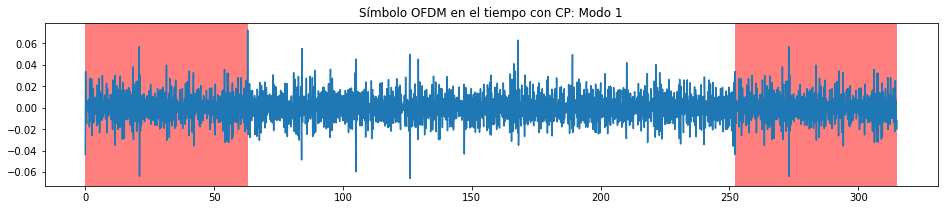

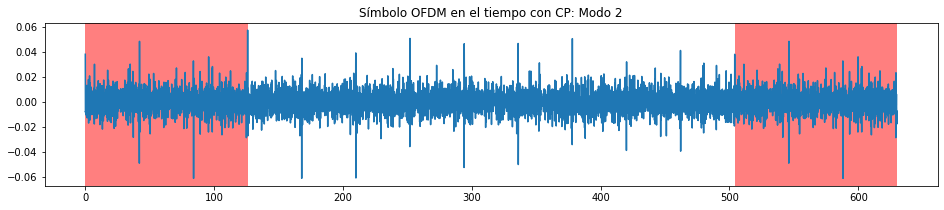

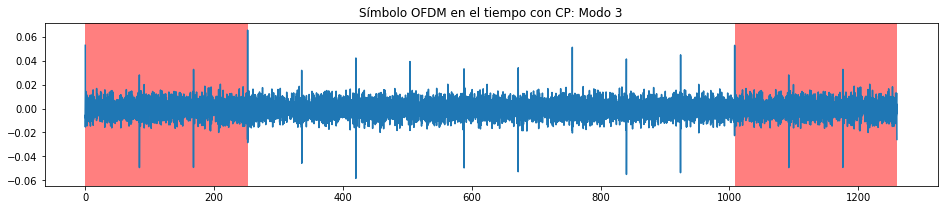

In [91]:
def addCP(OFDM_time,modo):
    #Toma las ultimas muestras CP y se agregan al inicio del simbolo
    if modo==1:
        cp = OFDM_time[-CP_1:]
        return np.hstack([cp, OFDM_time]) #con hstack se concatena
    if modo==2:
        cp = OFDM_time[-CP_2:]
        return np.hstack([cp, OFDM_time])
    if modo==3:
        cp = OFDM_time[-CP_3:]
        return np.hstack([cp, OFDM_time])

OFDM_with_CP1 = addCP(OFDM_time_1,1)
OFDM_with_CP2 = addCP(OFDM_time_2,2)
OFDM_with_CP3 = addCP(OFDM_time_3,3)

#Número de muestras luego de CP=(5/4)*K
print ("Número de muestras OFDM en el dominio del tiempo con prefijo cíclico, modo 1: ", len(OFDM_with_CP1))
print ("Número de muestras OFDM en el dominio del tiempo con prefijo cíclico, modo 2: ", len(OFDM_with_CP2))
print ("Número de muestras OFDM en el dominio del tiempo con prefijo cíclico, modo 3: ", len(OFDM_with_CP3))

plt.figure(figsize=(16,3))
plt.title("Símbolo OFDM en el tiempo con CP: Modo 1")
plt.plot(t1_con_CP,OFDM_with_CP1.real);
plt.axvspan(t1_con_CP[0],t1_con_CP[L_1//4], facecolor='red', alpha=0.5);
plt.axvspan(t1_con_CP[len(t1_con_CP)-L_1//4],t1_con_CP[-1], facecolor='red', alpha=0.5);
print("Duración del símbolo con el prefijo cíclico {0:.3f}us, modo 1.".format(t1_con_CP[-1]))

plt.figure(figsize=(16,3))
plt.title("Símbolo OFDM en el tiempo con CP: Modo 2")
plt.plot(t2_con_CP,OFDM_with_CP2.real);
plt.axvspan(t2_con_CP[0],t2_con_CP[L_2//4], facecolor='red', alpha=0.5);
plt.axvspan(t2_con_CP[len(t2_con_CP)-L_2//4],t2_con_CP[-1], facecolor='red', alpha=0.5);
print("Duración del símbolo con el prefijo cíclico {0:.3f}us, modo 2.".format(t2_con_CP[-1]))

plt.figure(figsize=(16,3))
plt.title("Símbolo OFDM en el tiempo con CP: Modo 3")
plt.plot(t3_con_CP,OFDM_with_CP3.real);
plt.axvspan(t3_con_CP[0],t3_con_CP[L_3//4], facecolor='red', alpha=0.5);
plt.axvspan(t3_con_CP[len(t3_con_CP)-L_3//4],t3_con_CP[-1], facecolor='red', alpha=0.5);
print("Duración del símbolo con el prefijo cíclico {0:.3f}us, modo 3.".format(t3_con_CP[-1]))

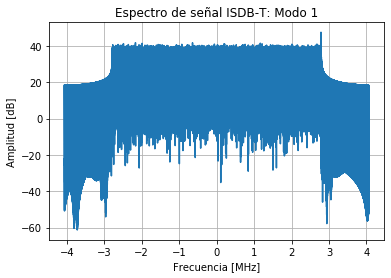

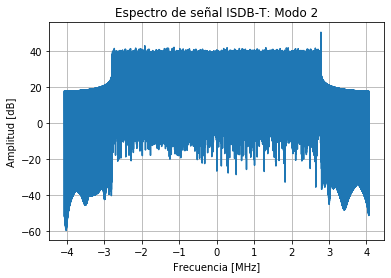

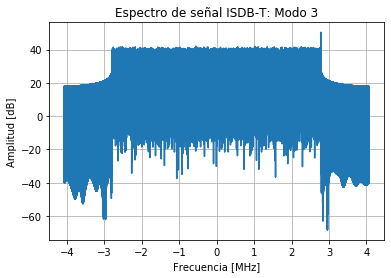

In [92]:
N_of_sym=204
frame1=np.empty(0)
frame2=np.empty(0)
frame3=np.empty(0)
for sym in range(N_of_sym//4):
    for i in range(4):
        # MODO 1
        bits = np.random.binomial(n=1, p=0.5, size=(payloadBits_per_OFDM_1, ))
        bits_SP = SP(bits,1)
        QAM = Mapping(bits_SP)
        OFDM_data = OFDM_symbol(QAM,i,1)
        OFDM_time = IFFT(OFDM_data)
        OFDM_withCP = addCP(OFDM_time,1)
        frame1=np.append(frame1,OFDM_withCP,axis=0)
        # MODO 2
        bits = np.random.binomial(n=1, p=0.5, size=(payloadBits_per_OFDM_2, ))
        bits_SP = SP(bits,2)
        QAM = Mapping(bits_SP)
        OFDM_data = OFDM_symbol(QAM,i,2)
        OFDM_time = IFFT(OFDM_data)
        OFDM_withCP = addCP(OFDM_time,2)
        frame2=np.append(frame2,OFDM_withCP,axis=0)
        # MODO 3
        bits = np.random.binomial(n=1, p=0.5, size=(payloadBits_per_OFDM_3, ))
        bits_SP = SP(bits,3)
        QAM = Mapping(bits_SP)
        OFDM_data = OFDM_symbol(QAM,i,3)
        OFDM_time = IFFT(OFDM_data)
        OFDM_withCP = addCP(OFDM_time,3)
        frame3=np.append(frame3,OFDM_withCP,axis=0)

plt.figure()
fcia=np.linspace(-fs/2,fs/2,len(frame1))
plt.plot(fcia,20*np.log10(np.abs(np.fft.fft(frame1))))
plt.title("Espectro de señal ISDB-T: Modo 1")
plt.xlabel("Frecuencia [MHz]")
plt.ylabel("Amplitud [dB]")
plt.grid(True)

plt.figure()
fcia=np.linspace(-fs/2,fs/2,len(frame2))
plt.plot(fcia,20*np.log10(np.abs(np.fft.fft(frame2))))
plt.title("Espectro de señal ISDB-T: Modo 2")
plt.xlabel("Frecuencia [MHz]")
plt.ylabel("Amplitud [dB]")
plt.grid(True)

plt.figure()
fcia=np.linspace(-fs/2,fs/2,len(frame3))
plt.plot(fcia,20*np.log10(np.abs(np.fft.fft(frame3))))
plt.title("Espectro de señal ISDB-T: Modo 3")
plt.xlabel("Frecuencia [MHz]")
plt.ylabel("Amplitud [dB]")
plt.grid(True)

## Medidas de Calidad
###  PAR (Peak Average Power Ratio)
Es la relacion entre la potencia pico y la potencia media, se expresa en dB. Normalmente se mide para una señal transmitida en un sistema de multiplexación por división de frecuencia ortogonal (OFDM). Se desea una PAPR más baja para un rendimiento eficiente de un sistema. 

La PAR se define como:

$PAR = \frac{MAX[x(t).x(t)*]}{E[x(t).x(t)*]}$

La PAR ocurre cuando en un sistema multiportador las diferentes subportadoras están desfasadas entre sí. En cada instante son diferentes entre sí en diferentes valores de fase. Cuando todos los puntos alcanzan el valor máximo simultáneamente, la envolvente de la señal de salida se dispara repentinamente, lo que provoca un "pico".

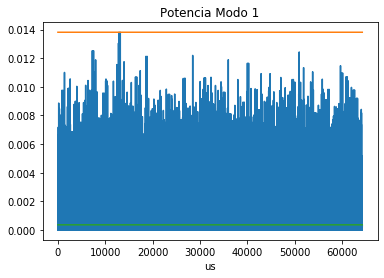

La relacion entre la potencia pico y la potencia media (modo 1) es 15.879 dB.


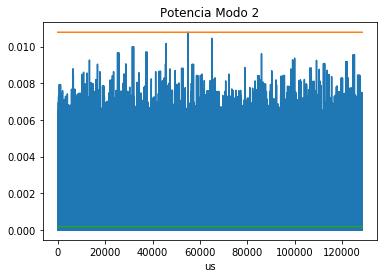

La relacion entre la potencia pico y la potencia media (modo 2) es 17.805 dB.


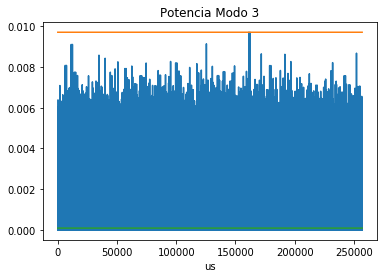

La relacion entre la potencia pico y la potencia media (modo 3) es 20.367 dB.


In [105]:
t1_frame=np.linspace(0,len(frame1)*ts,len(frame1))
t2_frame=np.linspace(0,len(frame2)*ts,len(frame2))
t3_frame=np.linspace(0,len(frame3)*ts,len(frame3))

#MODO 1
potencia_frame1=frame1*np.conj(frame1) #se calcula la potencia de la señal como la señal por su conjugado
plt.figure()
plt.plot(t1_frame,(potencia_frame1).real,label='instantanea')
plt.plot(t1_frame,np.ones(len(frame1))*np.max(potencia_frame1).real,label='pico')
plt.plot(t1_frame,np.ones(len(frame1))*np.mean(potencia_frame1).real,label='media')
plt.title("Potencia Modo 1")
plt.xlabel("us")
plt.show()

PAR1=(np.max(potencia_frame1)/np.mean(potencia_frame1)).real
print("La relacion entre la potencia pico y la potencia media (modo 1) es %.3f dB."%(10*np.log10(PAR1)))

#MODO 2
potencia_frame2=frame2*np.conj(frame2)
plt.figure()
plt.plot(t2_frame,(potencia_frame2).real,label='instantanea')
plt.plot(t2_frame,np.ones(len(frame2))*np.max(potencia_frame2).real,label='pico')
plt.plot(t2_frame,np.ones(len(frame2))*np.mean(potencia_frame2).real,label='media')
plt.title("Potencia Modo 2")
plt.xlabel("us")
plt.show()

PAR2=(np.max(potencia_frame2)/np.mean(potencia_frame2)).real
print("La relacion entre la potencia pico y la potencia media (modo 2) es %.3f dB."%(10*np.log10(PAR2)))

#MODO 3
potencia_frame3=frame3*np.conj(frame3)
plt.figure()
plt.plot(t3_frame,(potencia_frame3).real,label='instantanea')
plt.plot(t3_frame,np.ones(len(frame3))*np.max(potencia_frame3).real,label='pico')
plt.plot(t3_frame,np.ones(len(frame3))*np.mean(potencia_frame3).real,label='media')
plt.title("Potencia Modo 3")
plt.xlabel("us")
plt.show()

PAR3=(np.max(potencia_frame3)/np.mean(potencia_frame3)).real
print("La relacion entre la potencia pico y la potencia media (modo 3) es %.3f dB."%(10*np.log10(PAR3)))

### CCDF (Power Complementary Cumulative Distribution Function)

La curva CCDF muestra cuánto tiempo pasa la señal en o por encima del nivel de potencia promedio de la señal medida (en dB), o de manera equivalente, la probabilidad de que la potencia de la señal esté por encima del nivel de potencia promedio.

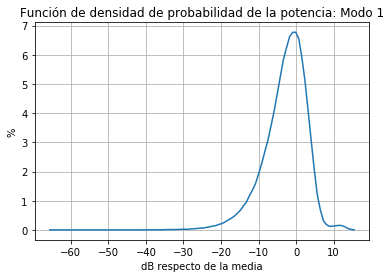

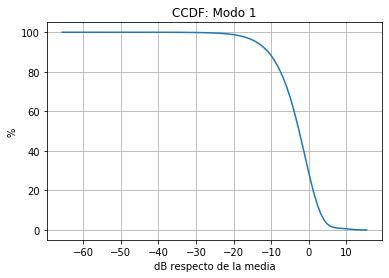

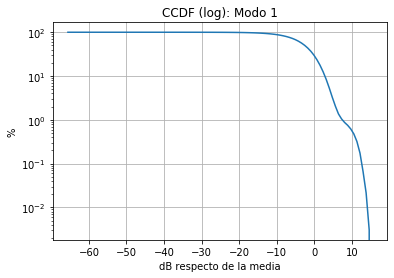

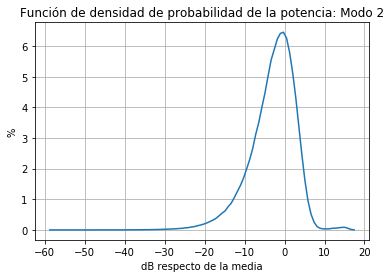

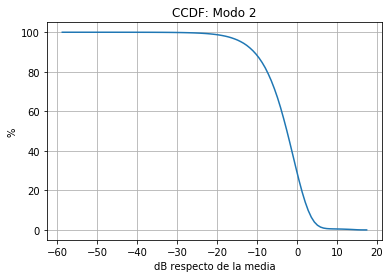

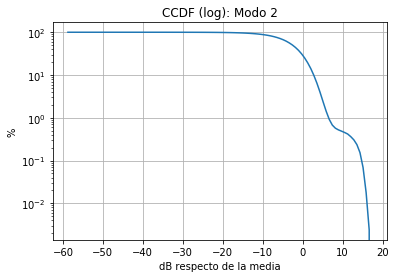

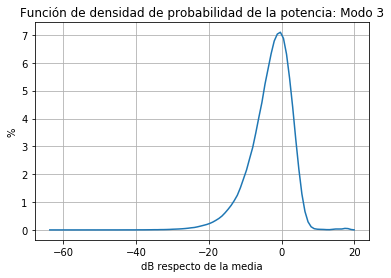

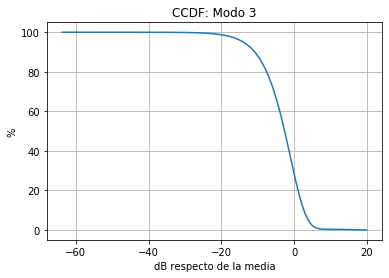

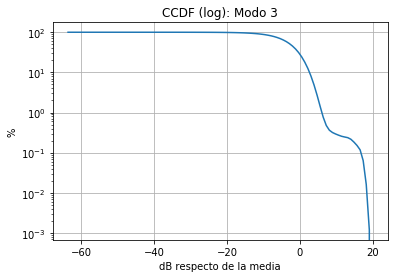

In [106]:
def CCDF(potencia):
    h = np.histogram(potencia, 100)
    CCDF=1-h[0].cumsum()
    return (h[1][:-1]+h[1][1:])/2, (CCDF/len(potencia)+1)*100

def CCDFdB(potencia):
    dB=10*np.log10(potencia.real)-10*np.log10(np.mean(potencia.real))  # 0dB sera respecto de la potencia media   
    h = np.histogram(dB, 100)
    H = np.cumsum(h[0])/len(potencia)
    CH=1-H
    return (h[1][:-1]+h[1][1:])/2,CH*100

dB1=10*np.log10(potencia_frame1.real)-10*np.log10(np.mean(potencia_frame1.real))  # 0dB sera respecto de la potencia media   
dB2=10*np.log10(potencia_frame2.real)-10*np.log10(np.mean(potencia_frame2.real))  # 0dB sera respecto de la potencia media   
dB3=10*np.log10(potencia_frame3.real)-10*np.log10(np.mean(potencia_frame3.real))  # 0dB sera respecto de la potencia media   

h1 = np.histogram(dB1, 100)
h2 = np.histogram(dB2, 100)
h3 = np.histogram(dB3, 100)

# MODO 1 
plt.figure()
plt.plot((h1[1][:-1]+h1[1][1:])/2,(h1[0]/len(dB1))*100)
plt.title("Función de densidad de probabilidad de la potencia: Modo 1")
plt.xlabel("dB respecto de la media")
plt.ylabel("%")
plt.grid(True)

plt.figure()
x,y=CCDFdB((potencia_frame1.real))
plt.plot(x,y)
plt.title("CCDF: Modo 1")
plt.xlabel("dB respecto de la media")
plt.ylabel("%")
plt.grid(True)

fig, ax = plt.subplots()

ax.semilogy(x,y)
ax.grid()
ax.set_title("CCDF (log): Modo 1")
ax.set_xlabel("dB respecto de la media")
ax.set_ylabel("%")
plt.show()

# MODO 2
plt.figure()
plt.plot((h2[1][:-1]+h2[1][1:])/2,(h2[0]/len(dB2))*100)
plt.title("Función de densidad de probabilidad de la potencia: Modo 2")
plt.xlabel("dB respecto de la media")
plt.ylabel("%")
plt.grid(True)

plt.figure()
x,y=CCDFdB((potencia_frame2.real))
plt.plot(x,y)
plt.title("CCDF: Modo 2")
plt.xlabel("dB respecto de la media")
plt.ylabel("%")
plt.grid(True)

fig, ax = plt.subplots()

ax.semilogy(x,y)
ax.grid()
ax.set_title("CCDF (log): Modo 2")
ax.set_xlabel("dB respecto de la media")
ax.set_ylabel("%")
plt.show()

# MODO 3
plt.figure()
plt.plot((h3[1][:-1]+h3[1][1:])/2,(h3[0]/len(dB3))*100)
plt.title("Función de densidad de probabilidad de la potencia: Modo 3")
plt.xlabel("dB respecto de la media")
plt.ylabel("%")
plt.grid(True)

plt.figure()
x,y=CCDFdB((potencia_frame3.real))
plt.plot(x,y)
plt.title("CCDF: Modo 3")
plt.xlabel("dB respecto de la media")
plt.ylabel("%")
plt.grid(True)

fig, ax = plt.subplots()

ax.semilogy(x,y)
ax.grid()
ax.set_title("CCDF (log): Modo 3")
ax.set_xlabel("dB respecto de la media")
ax.set_ylabel("%")
plt.show()

# Canal de Transmisión
Por ultimo se simula el canal de transmisión, la señal se manda por antenas y por el canal de comuninaciones se la manda al receptor. A este canal se lo modula como un canal estático multi-trayectorias con respuesta al impulso denominada channelResponse. De esta manera la señal en el extremo receptor es la convolución entre la señal transmitida con la respuesta en frecuencia del canal. 

Potencia de la señal RX: 0.00027. Potencia del ruido: 0.00000


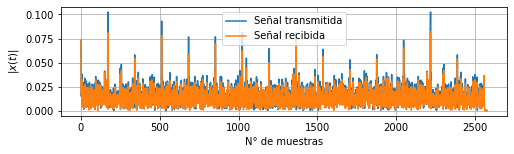

In [127]:
#Se va a agregar ruido a la señal de acuerdo con el valor de SNR del canal.
def channel(signal):
    convolved = np.convolve(signal, channelResponse)
    signal_power = np.mean(abs(convolved**2))
    sigma2 = signal_power * 10**(-SNRdb/10) 
    print ("Potencia de la señal RX: %.5f. Potencia del ruido: %.5f" % (signal_power, sigma2))
    noise = np.sqrt(sigma2/2) * (np.random.randn(*convolved.shape)+1j*np.random.randn(*convolved.shape))
    return convolved + noise

OFDM_TX = OFDM_with_CP1
OFDM_RX = channel(OFDM_TX)
plt.figure(figsize=(8,2))
plt.plot(abs(OFDM_TX), label='Señal transmitida')
plt.plot(abs(OFDM_RX), label='Señal recibida')
plt.legend(fontsize=10)
plt.xlabel('N° de muestras'); plt.ylabel('$|x(t)|$');
plt.grid(True);

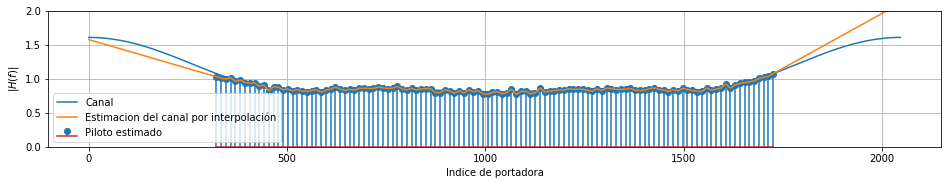

In [114]:
#En el receptor, el prefijo ciclico es eliminado de la señal y se extrae una ventana de la señal recibida
def removeCP(signal,modo):
    if modo==1:
        return signal[CP_1:(CP_1+L_1)]
    if modo==2:
        return signal[CP_2:(CP_2+L_2)]
    if modo==3:
        return signal[CP_3:(CP_3+L_3)]
OFDM_RX_noCP1 = removeCP(OFDM_RX,1)

#Se transforma a la señal al dominio de la frecuencia
def FFT(OFDM_RX):
    return np.fft.fft(OFDM_RX)
OFDM_demod = FFT(OFDM_RX_noCP1)

#El siguiente paso es estimar el canal inalambrico
def channelEstimate(OFDM_demod):
    #Se extrae el piloto de la señal recibida y se divide el valor de los pilotos transmitidos
    pilots = OFDM_demod[pilotCarriers_11]
    Hest_at_pilots = pilots / pilotValue
    # Hago una interpolacion entre las portadoras piloto para obtener una estimación del canal sobre las portadoras de datos
    # Interpolamos el valor absoluto y la fase por separado
    Hest_abs = interpolate.interp1d(pilotCarriers_11, abs(Hest_at_pilots), kind='linear',fill_value="extrapolate")(allCarriers_1)
    Hest_phase = interpolate.interp1d(pilotCarriers_11, np.angle(Hest_at_pilots), kind='linear',fill_value="extrapolate")(allCarriers_1)
    Hest = Hest_abs * np.exp(1j*Hest_phase)
    
    plt.figure(figsize=(16,2.5))
    plt.plot(allCarriers_1, abs(H_exact), label='Canal')
    plt.stem(pilotCarriers_11, abs(Hest_at_pilots), label='Piloto estimado',use_line_collection=True)
    plt.plot(allCarriers_1, abs(Hest), label='Estimacion del canal por interpolación')
    plt.grid(True)
    plt.xlabel('Indice de portadora')
    plt.ylabel('$|H(f)|$')
    plt.legend(fontsize=10)
    plt.ylim(0,2)
    return Hest
Hest = channelEstimate(OFDM_demod)

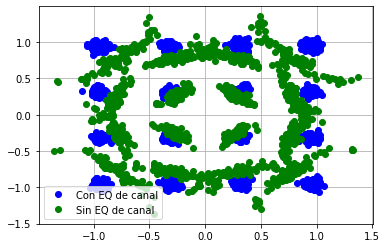

In [118]:
#Se pasa el canal estimado en el ecualizador
def equalize(OFDM_demod, Hest):
    return OFDM_demod / Hest
equalized_Hest = equalize(OFDM_demod, Hest)

#Ahora se extraen las portadoras de datos a partir de los simbolos ecualizados

def get_payload(equalized):
    return equalized[dataCarriers_11]
QAM_est = get_payload(equalized_Hest)
QAM_sin_est = get_payload(OFDM_demod)

plt.plot(QAM_est.real, QAM_est.imag, 'bo',label="Con EQ de canal");
plt.plot(QAM_sin_est.real, QAM_sin_est.imag, 'go',label="Sin EQ de canal");
plt.grid(True);
plt.legend(fontsize=10);

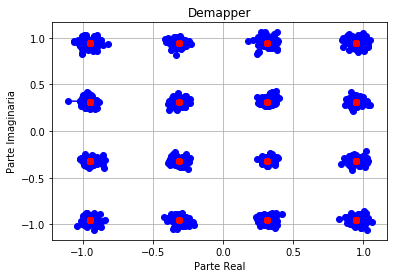

In [119]:
#Recuperada la constelacion ahora se envian los valores complejos a demapear,
#de esta manera se transforman los puntos de la constelacion en grupos de bits
def Demapping(QAM):
    constellation = np.array([x for x in demapping_table.keys()])#se arreglan los puntos posibles
    dists = abs(QAM.reshape((-1,1)) - constellation.reshape((1,-1)))#se calcula la distancia de cada punto recibida a cada punto posible de la constelacion
    const_index = dists.argmin(axis=1)
    hardDecision = constellation[const_index]#se recupera el punto de constelacion real
    return np.vstack([demapping_table[C] for C in hardDecision]), hardDecision#se transforma en grupo de bits

PS_est, hardDecision = Demapping(QAM_est)
for qam, hard in zip(QAM_est, hardDecision):
    plt.plot([qam.real, hard.real], [qam.imag, hard.imag], 'b-o');
    plt.plot(hardDecision.real, hardDecision.imag, 'ro');
plt.grid(True); plt.xlabel('Parte Real');
plt.ylabel('Parte Imaginaria');
plt.title('Demapper');

In [125]:
#Por ultimo se convierten los grupos de bits en un flujo de bits mediante un conversor paralelo-serie
def PS(bits):
    return bits.reshape((-1,))
bits_est = PS(PS_est)
#Se calcula el Bit Error Rate
print ("BER obtenido:{0:.5f}".format(np.sum(abs(bits1-bits_est))/len(bits1))) 

BER obtenido:0.00000
